In [1]:
#using Revise
addprocs(4)
using VDPTag2, CMDPs
using POMDPs, POMDPToolbox, MCTS
using DataFrames
using Plots; gr()

Plots.GRBackend()

In [2]:
mdp = VDPTagMDP()
b = CBTSBandit(mdp)
solver = ModularSolver(mdp, b)
policy = solve(solver, mdp);

In [3]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)

VDPTag2.TagState([0.0, 0.0], [-2.88237, 2.41526])

In [4]:
hr = HistoryRecorder(; max_steps=30, rng=Base.GLOBAL_RNG)
h = simulate(hr, mdp, policy, s0);

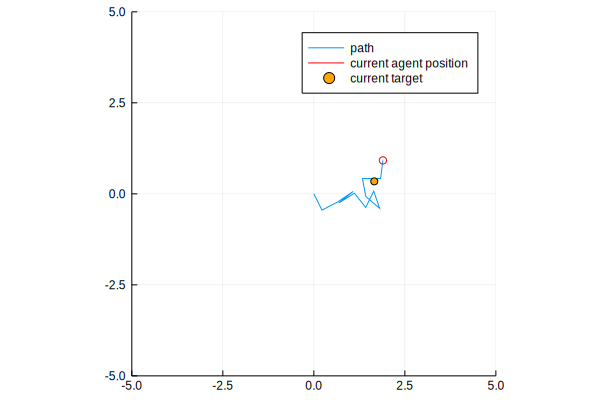

In [5]:
plot(mdp, h)

In [6]:
## Study

In [7]:
study = RewardvsN(VDPTagMDP)

CMDPs.RewardvsN
  mdp: VDPTag2.VDPTagMDP{Void}
  bandits: Array{DataType}((3,))
  n_seeds: Int64 500
  n_iters: Array{Int64}((10,)) [10, 50, 100, 200, 500, 1000, 1500, 2000, 2500, 3000]
  max_steps: Int64 10


In [8]:
result = run_study(study)

CMDPs.RewardvsNResult("VDPTag", 15000×4 DataFrames.DataFrame
│ Row   │ alg        │ seed │ n_iters │ r_total │
├───────┼────────────┼──────┼─────────┼─────────┤
│ 1     │ DPWBandit  │ 1    │ 10      │ -10.0   │
│ 2     │ DPWBandit  │ 2    │ 10      │ -10.0   │
│ 3     │ DPWBandit  │ 3    │ 10      │ -10.0   │
│ 4     │ DPWBandit  │ 4    │ 10      │ -10.0   │
│ 5     │ DPWBandit  │ 5    │ 10      │ -10.0   │
│ 6     │ DPWBandit  │ 6    │ 10      │ -10.0   │
│ 7     │ DPWBandit  │ 7    │ 10      │ 91.0    │
│ 8     │ DPWBandit  │ 8    │ 10      │ -10.0   │
│ 9     │ DPWBandit  │ 9    │ 10      │ -10.0   │
│ 10    │ DPWBandit  │ 10   │ 10      │ -10.0   │
│ 11    │ DPWBandit  │ 11   │ 10      │ -10.0   │
⋮
│ 14989 │ CBTSBandit │ 489  │ 3000    │ -10.0   │
│ 14990 │ CBTSBandit │ 490  │ 3000    │ 94.0    │
│ 14991 │ CBTSBandit │ 491  │ 3000    │ 91.0    │
│ 14992 │ CBTSBandit │ 492  │ 3000    │ 91.0    │
│ 14993 │ CBTSBandit │ 493  │ 3000    │ 94.0    │
│ 14994 │ CBTSBandit │ 494  │ 3000   

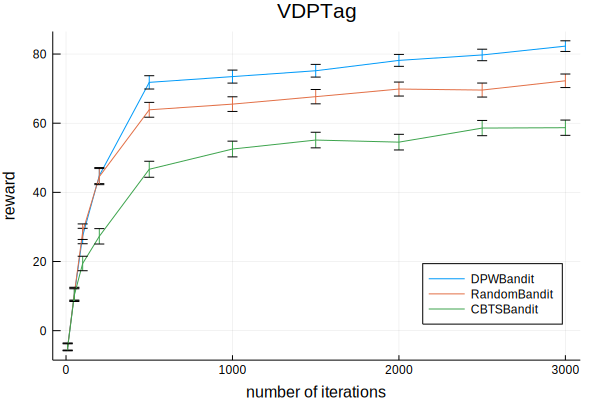

In [9]:
p=plot(result)

In [10]:
savefig(p, "./RvN_vdptag.pdf")

In [11]:
function rand_in_range(rg::Range,n::Int)
    r=randperm(length(rg))
    rg[r[1:n]]
end

rand_in_range (generic function with 1 method)

LoadError: [91mBoundsError: attempt to access 8-element Array{Int64,1} at index [1:9][39m